In [248]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [256]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [250]:
 train["Embarked"].unique(), train["Age"].unique()

(array(['S', 'C', 'Q', nan], dtype=object),
 array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
         14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
         15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
         18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
         11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
         33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
         14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
         40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
         20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
         60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
         80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ]))

In [211]:
gender = [1.0 if i=='female' else 0.0 for i in train["Sex"]]
embarked = []
X = np.array([train["Age"].fillna(train["Age"].mean()),train["Fare"], 
                    gender, train["Pclass"]])
y = np.array(train["Survived"])
X = X.T

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

In [343]:
tits = DecisionTreeClassifier(criterion="entropy",max_depth=3, random_state=0)
tits.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [344]:
y_final = tits.predict(final)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 50


In [321]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81


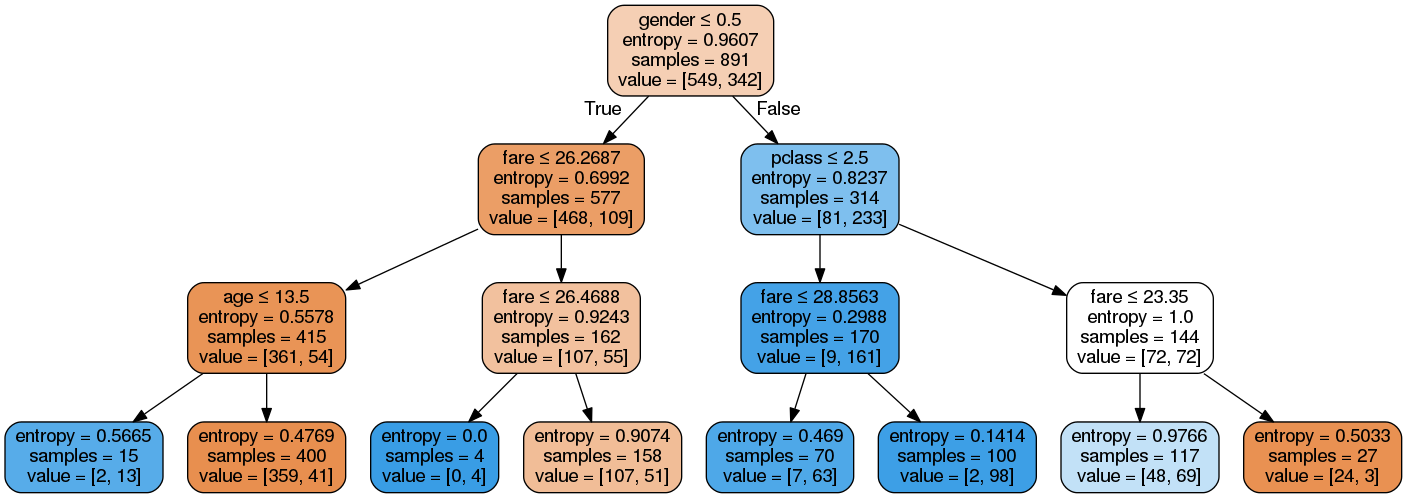

In [407]:
from IPython.display import Image
from sklearn.tree import export_graphviz
tree.export_graphviz(tits, out_file='titanic.dot',  
                         feature_names=["age", "fare", "gender", "pclass"],  
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
Image("titanic.png")

In [260]:
gender_f = [1.0 if i=='female' else 0.0 for i in test_df["Sex"]]
final = np.array([test_df["Age"].fillna(test_df["Age"].mean()),test_df["Fare"], 
                    gender_f, test_df["Pclass"]]).T
final.shape

(418, 4)

In [278]:
fix = np.isnan(final[:,1])

In [292]:
final[152,1] = (final[:151,1].sum() + final[153:,1].sum())/417

35.608253717026379

In [297]:
solution = pd.DataFrame(test_df["PassengerId"])

In [345]:
solution["Survived"] = y_final

In [317]:
solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [330]:
solution.to_csv("python_titanic.csv", index=False)

In [346]:
solution["Survived"].sum()

156

In [350]:
solution2 = solution.copy()

In [403]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, criterion="gini", n_jobs=4, random_state=2)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [404]:
rf_final = clf.predict(final)

In [405]:
solution2["Survived"] = rf_final
solution2["Survived"].sum()

139